In [ ]:
#import necessary libraries for managing and visualizing dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Developing AI Application/weather.csv'

In [ ]:
#read weather sample dataset
df = pd.read_csv(path)
#display dataset
print(df)

      YEAR  ...  Wind direction at 10 meters (Degrees)
0     2021  ...                                  10.35
1     2021  ...                                   6.82
2     2021  ...                                   3.39
3     2021  ...                                   1.63
4     2021  ...                                 357.78
...    ...  ...                                    ...
2155  2021  ...                                 156.19
2156  2021  ...                                 159.37
2157  2021  ...                                 164.25
2158  2021  ...                                 166.07
2159  2021  ...                                 164.17

[2160 rows x 10 columns]


#Data Understanding

In [ ]:
#display first 5 observations
df.head()

,YEAR,MONTH,DAY,HOUR,Temperature at 2 meters (C),Specific Humidity at 2 meters (g/kg),Precipitation corrected (mm/hour),Surface pressure (kPa),Wind speed at 10 meters (m/s),Wind direction at 10 meters (Degrees)
0,2021,1,1,0,19.85,12.63,0.01,100.71,2.74,10.35
1,2021,1,1,1,19.57,12.57,0.01,100.65,2.57,6.82
2,2021,1,1,2,19.30,12.45,0.02,100.59,2.51,3.39
3,2021,1,1,3,19.05,12.39,0.01,100.56,2.47,1.63
4,2021,1,1,4,18.99,12.51,0.01,100.59,2.22,357.78


In [ ]:
#display last 5 observations
df.tail()

,YEAR,MONTH,DAY,HOUR,Temperature at 2 meters (C),Specific Humidity at 2 meters (g/kg),Precipitation corrected (mm/hour),Surface pressure (kPa),Wind speed at 10 meters (m/s),Wind direction at 10 meters (Degrees)
2155,2021,3,31,19,30.33,14.77,0.0,99.90,6.77,156.19
2156,2021,3,31,20,28.87,15.26,0.0,99.98,5.99,159.37
2157,2021,3,31,21,27.94,15.69,0.0,100.04,4.95,164.25
2158,2021,3,31,22,27.36,16.05,0.0,100.08,4.22,166.07
2159,2021,3,31,23,26.93,16.48,0.0,100.09,3.81,164.17


In [ ]:
#display rows and columns of dataset
df.shape

(2160, 10)

In [ ]:
#describe the dataset
df.describe()

,YEAR,MONTH,DAY,HOUR,Temperature at 2 meters (C),Specific Humidity at 2 meters (g/kg),Precipitation corrected (mm/hour),Surface pressure (kPa),Wind speed at 10 meters (m/s),Wind direction at 10 meters (Degrees)
count,2160.0,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000
mean,2021.0,2.000000,15.533333,11.500000,26.779157,14.577634,0.004907,100.509444,2.625134,125.655060
std,0.0,0.830186,8.713695,6.923789,5.114564,2.006087,0.034652,0.235220,1.521029,89.311855
min,2021.0,1.000000,1.000000,0.000000,14.680000,8.610000,0.000000,99.630000,0.070000,0.000000
25%,2021.0,1.000000,8.000000,5.750000,22.897500,13.240000,0.000000,100.360000,1.530000,64.050000
50%,2021.0,2.000000,15.500000,11.500000,25.970000,14.710000,0.000000,100.520000,2.280000,120.610000
75%,2021.0,3.000000,23.000000,17.250000,30.210000,16.170000,0.000000,100.680000,3.400000,148.867500
max,2021.0,3.000000,31.000000,23.000000,40.260000,19.650000,0.650000,101.130000,8.340000,359.810000


In [ ]:
#check missing values
df.isnull().any()

YEAR                                     False
MONTH                                    False
DAY                                      False
HOUR                                     False
Temperature at 2 meters (C)              False
Specific Humidity at 2 meters (g/kg)     False
Precipitation corrected (mm/hour)        False
Surface pressure (kPa)                   False
Wind speed at 10 meters (m/s)            False
Wind direction at 10 meters (Degrees)    False
dtype: bool

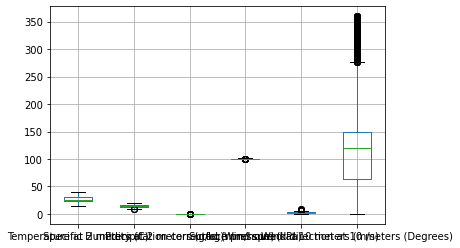

In [ ]:
#plotting boxplot to check the outliers in 6 main features such as Temperature at 2 meters (C),
#Specific Humidity at 2 meters (g/kg),	Precipitation corrected (mm/hour),
#Surface pressure (kPa),	Wind speed at 10 meters (m/s),	Wind direction at 10 meters (Degrees)
df[['Temperature at 2 meters (C)',	'Specific Humidity at 2 meters (g/kg)'
,	'Precipitation corrected (mm/hour)',	'Surface pressure (kPa)',	'Wind speed at 10 meters (m/s)',	'Wind direction at 10 meters (Degrees)']].boxplot()
plt.show()

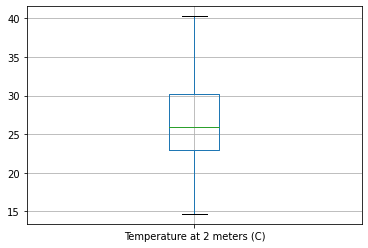

In [ ]:
#Temperature at 2 meters (C)
df[['Temperature at 2 meters (C)']].boxplot()
plt.show()

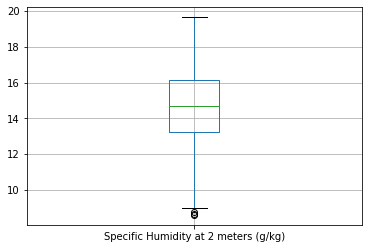

In [ ]:
#Specific Humidity at 2 meters (g/kg)
df[['Specific Humidity at 2 meters (g/kg)']].boxplot()
plt.show()

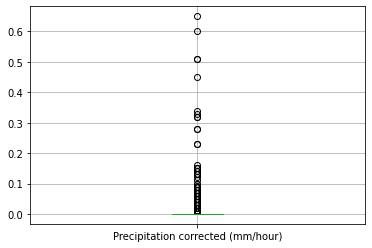

In [ ]:
#Precipitation corrected (mm/hour)
df[['Precipitation corrected (mm/hour)']].boxplot()
plt.show()

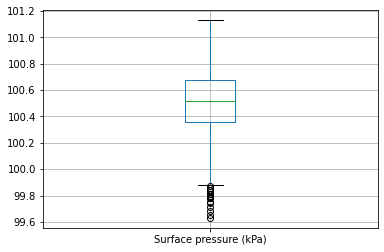

In [ ]:
#Surface pressure (kPa)
df[['Surface pressure (kPa)']].boxplot()
plt.show()

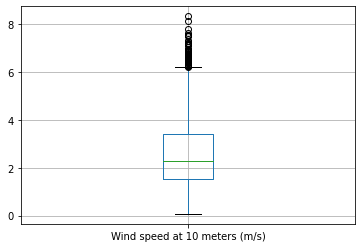

In [ ]:
#Wind speed at 10 meters (m/s)
df[['Wind speed at 10 meters (m/s)']].boxplot()
plt.show()

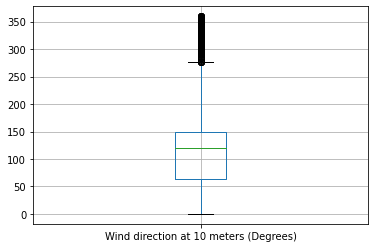

In [ ]:
#Wind direction at 10 meters (Degrees)
df[['Wind direction at 10 meters (Degrees)']].boxplot()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa61e7495d0>,
      dtype=object)

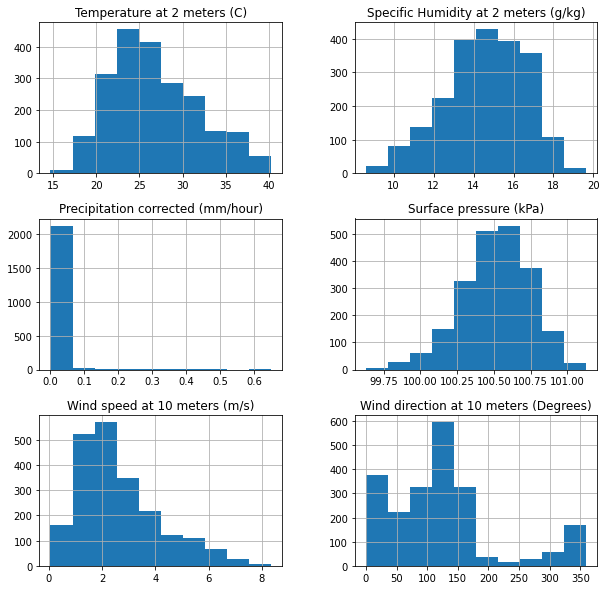

In [ ]:
#using histogram to check distribution of each feature
df[['Temperature at 2 meters (C)',	'Specific Humidity at 2 meters (g/kg)'
,	'Precipitation corrected (mm/hour)',	'Surface pressure (kPa)',	'Wind speed at 10 meters (m/s)',	'Wind direction at 10 meters (Degrees)']].hist(figsize = (10,10))

#Data Preparation

dropping features

In [ ]:
#drop features YEAR, MONTH, DAY and HOUR
df.drop(['YEAR', 'MONTH', 'DAY', 'HOUR'], axis=1, inplace=True)

In [ ]:
df.head()

,Temperature at 2 meters (C),Specific Humidity at 2 meters (g/kg),Precipitation corrected (mm/hour),Surface pressure (kPa),Wind speed at 10 meters (m/s),Wind direction at 10 meters (Degrees)
0,19.85,12.63,0.01,100.71,2.74,10.35
1,19.57,12.57,0.01,100.65,2.57,6.82
2,19.30,12.45,0.02,100.59,2.51,3.39
3,19.05,12.39,0.01,100.56,2.47,1.63
4,18.99,12.51,0.01,100.59,2.22,357.78


Create New Feature

In [ ]:
#Now we get the values from the 25th position til the end of Temperature at 2 meters (C) column and put
#them in Temperature after day and this feature is the output
df['Temperature_after_day']=df['Temperature at 2 meters (C)'].shift(-24)

In [ ]:
df.head()

,Temperature at 2 meters (C),Specific Humidity at 2 meters (g/kg),Precipitation corrected (mm/hour),Surface pressure (kPa),Wind speed at 10 meters (m/s),Wind direction at 10 meters (Degrees),Temperature_after_day
0,19.85,12.63,0.01,100.71,2.74,10.35,19.70
1,19.57,12.57,0.01,100.65,2.57,6.82,19.27
2,19.30,12.45,0.02,100.59,2.51,3.39,19.01
3,19.05,12.39,0.01,100.56,2.47,1.63,18.80
4,18.99,12.51,0.01,100.59,2.22,357.78,18.50


In [ ]:
df.isnull().any()

Temperature at 2 meters (C)              False
Specific Humidity at 2 meters (g/kg)     False
Precipitation corrected (mm/hour)        False
Surface pressure (kPa)                   False
Wind speed at 10 meters (m/s)            False
Wind direction at 10 meters (Degrees)    False
Temperature_after_day                     True
dtype: bool

In [ ]:
#handling missing values
df.dropna(inplace=True)

In [ ]:
df.isnull().any()

Temperature at 2 meters (C)              False
Specific Humidity at 2 meters (g/kg)     False
Precipitation corrected (mm/hour)        False
Surface pressure (kPa)                   False
Wind speed at 10 meters (m/s)            False
Wind direction at 10 meters (Degrees)    False
Temperature_after_day                    False
dtype: bool

Data preprocessing

In [ ]:
#Now we will preprocessing data and we will use the mean removal method 
#to remove a mean from every feature so that it could center on zero
#It also helps to remove bias from the feature
from sklearn import preprocessing
X=df.drop('Temperature_after_day', axis=1).values
X=preprocessing.scale(X)
y=df['Temperature_after_day'].values

In [ ]:
#Now the mean of every feature in input date is almost equal 0
X.mean(axis=0)

array([ 7.98362624e-17, -1.01125932e-15,  2.66120875e-17, -1.49027690e-14,
       -1.59672525e-16, -5.98771968e-17])

In [ ]:
#standarn deviation (độ lệch chuẩn)
X.std()

1.0

Splitting data

In [ ]:
#We will split the dataset into 2 parts, 70% for training and 30% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Calculating importance of each feature

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg=RandomForestRegressor(n_estimators=500,random_state=42, max_features=0.3, max_depth=10, min_samples_leaf=3)
#fit the model
reg.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_features=0.3, min_samples_leaf=3,
                      n_estimators=500, random_state=42)

In [ ]:
#calculating the importance of feature
reg.feature_importances_

array([0.57270285, 0.11519083, 0.00633951, 0.15199897, 0.08041075,
       0.07335709])

<BarContainer object of 6 artists>

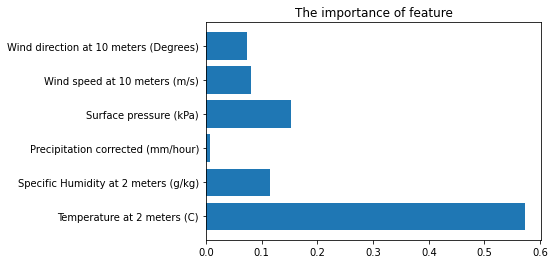

In [ ]:
plt.title('The importance of feature')
plt.barh(['Temperature at 2 meters (C)',	'Specific Humidity at 2 meters (g/kg)'
,	'Precipitation corrected (mm/hour)',	'Surface pressure (kPa)',	'Wind speed at 10 meters (m/s)',	'Wind direction at 10 meters (Degrees)'], reg.feature_importances_)

Dropping Percipitation corrected (mm/hour)

In [ ]:
df.drop(['Precipitation corrected (mm/hour)'], axis=1, inplace=True)

In [ ]:
df.head()

,Temperature at 2 meters (C),Specific Humidity at 2 meters (g/kg),Surface pressure (kPa),Wind speed at 10 meters (m/s),Wind direction at 10 meters (Degrees),Temperature_after_day
0,19.85,12.63,100.71,2.74,10.35,19.70
1,19.57,12.57,100.65,2.57,6.82,19.27
2,19.30,12.45,100.59,2.51,3.39,19.01
3,19.05,12.39,100.56,2.47,1.63,18.80
4,18.99,12.51,100.59,2.22,357.78,18.50


Data preprocessing

In [ ]:
#Now we will preprocessing data and we will use the mean removal method 
#to remove a mean from every feature so that it could center on zero
#It also helps to remove bias from the feature
from sklearn import preprocessing
df.dropna(inplace=True)
X=df.drop('Temperature_after_day', axis=1).values
X=preprocessing.scale(X)
y=df['Temperature_after_day'].values

In [ ]:
#Now the mean of every feature in input date is almost equal 0
X.mean(axis=0)

array([ 7.98362624e-17, -1.01125932e-15, -1.49027690e-14, -1.59672525e-16,
       -5.98771968e-17])

In [ ]:
#standarn deviation (độ lệch chuẩn)
X.std()

1.0

Splitting data

In [ ]:
#We will split the dataset into 2 parts, 70% for training and 30% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Modeling

Random Forest model

In [ ]:
reg=RandomForestRegressor(n_estimators=500,random_state=42, max_features=0.3, max_depth=10, min_samples_leaf=3)
reg.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_features=0.3, min_samples_leaf=3,
                      n_estimators=500, random_state=42)

In [ ]:
#set up arrays to store n_estimators, training and testing accuracies
estimators = np.arange(1, 100)
train_R_Squared = np.empty(len(estimators))
test_R_Squared = np.empty(len(estimators))

for i, n in enumerate(estimators):

    #set up randomforest with n_estimators
    reg=RandomForestRegressor(n_estimators=n,random_state=42, max_features=0.3, max_depth=10, min_samples_leaf=3)
    #fit the model
    reg.fit(X_train,y_train)

    #computing R squared on the training set
    train_R_Squared[i] = reg.score(X_train, y_train)

    #computing R squared on the test set
    test_R_Squared[i] = reg.score(X_test, y_test)

Evaluation of Random Forest model

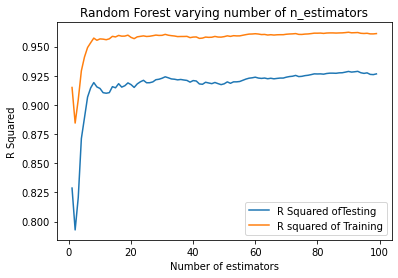

In [ ]:
#Now we are showing the line graph about testing accuracy and training accuracy
plt.title('Random Forest varying number of n_estimators')
plt.plot(estimators, test_R_Squared, label='R Squared ofTesting')
plt.plot(estimators, train_R_Squared, label='R squared of Training')
plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('R Squared')
plt.show()

In [ ]:
result_test = reg.score(X_test, y_test)
result_train = reg.score(X_train, y_train)
print('R Squared of testing = ', result_test)
print('R squared of training = ', result_train)

R Squared of testing =  0.9266072480726615
R squared of training =  0.9611793470840871


In [ ]:
pred = reg.predict(X_test)

In [ ]:
#Calculating mean square error
difference_array = np.subtract(y_test, pred)
squared_array = np.square(difference_array)
MSE = squared_array.mean()

In [ ]:
print('Mean Square Error: ', MSE)

Mean Square Error:  1.952357008760385


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Y test')

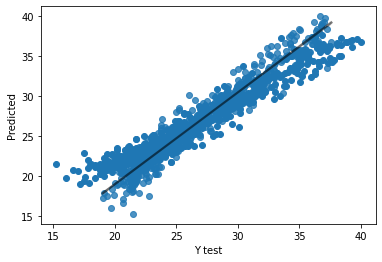

In [ ]:
plt.scatter(y_test, pred)
sns.regplot(pred,y_test,line_kws={'color':'black','alpha':0.5})
plt.ylabel('Predicted')
plt.xlabel('Y test')

KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
knn_params = {"n_neighbors" : np.arange(1,11,1)}
knn = KNeighborsRegressor()
#cv is cross-validation
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [ ]:
print("optimal K = ", knn_cv_model.best_params_["n_neighbors"])

optimal K =  7


In [ ]:
knn_model = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"]).fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

Evaluation of KNN model

In [ ]:
print("R squared of training: ", knn_model.score(X_train, y_train))
print("R squared of testing: ", knn_model.score(X_test, y_test))

R squared of training:  0.9606504379280163
R squared of testing:  0.9479347193985699


In [ ]:
#Calculating mean square error
difference_array = np.subtract(y_test, pred)
squared_array = np.square(difference_array)
MSE = squared_array.mean()

In [ ]:
print('Mean Square Error: ', MSE)

Mean Square Error:  1.952357008760385


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Y test')

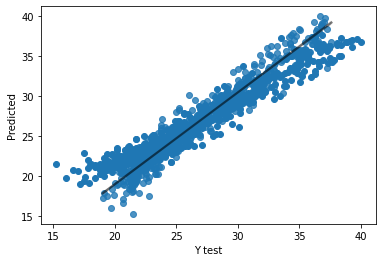

In [ ]:
plt.scatter(y_test, pred)
sns.regplot(pred,y_test,line_kws={'color':'black','alpha':0.5})
plt.ylabel('Predicted')
plt.xlabel('Y test')

Neural Networks

In [ ]:
import xgboost as xgb
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn import ensemble
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [ ]:
model_NN = MLPRegressor(solver='lbfgs', hidden_layer_sizes=30,
                           max_iter=100, random_state=42,
                           activation="relu") 

In [ ]:
model_NN.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(hidden_layer_sizes=30, max_iter=100, random_state=42,
             solver='lbfgs')

In [ ]:
y_pred = model_NN.predict(X_test)

Evaluation of Neural Networks model

In [ ]:
print('R squared of training: ',model_NN.score(X_train, y_train))

R squared of training:  0.961871554374515


In [ ]:
print('R squared of testing: ',model_NN.score(X_test, y_test))

R squared of testing:  0.9599262587176876


In [ ]:
#Calculating mean square error
difference_array = np.subtract(y_test, pred)
squared_array = np.square(difference_array)
MSE = squared_array.mean()

In [ ]:
print('Mean Square Error: ', MSE)

Mean Square Error:  1.952357008760385


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Y test')

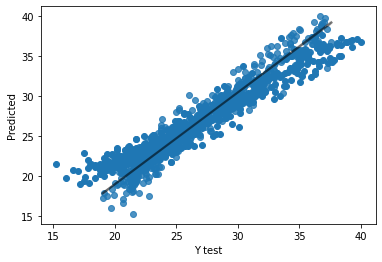

In [ ]:
plt.scatter(y_test, pred)
sns.regplot(pred,y_test,line_kws={'color':'black','alpha':0.5})
plt.ylabel('Predicted')
plt.xlabel('Y test')